In [1]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)

## Exercise 10.1

##### (a)
We first derive the asymptotic distribution of the $p$ sample quantiles ($X_{[np]}$) for the distribution $F_X(x)$ (cdf).
Let
$$
Y_n(x) = \frac{1}{n}\sum_{i=1}^n I\{X_i \leq x\} = \frac{1}{n}\sum_{i=1}^n Z_i
$$
It's easy to see
$$
\mathbb{E}(Z_i) = F_X(x)
$$
$$
\mathrm{Var}(Z_i) = F_X(x)(1 - F_X(x))
$$
So according to The Central Limit Theorem
$$
\sqrt{n}(Y_n(x) - F_X(x)) \xrightarrow{d} \mathcal{N}(0, F_X(x)(1 - F_X(x))
$$
Now consider transformation $g(t) = F^{-1}_X(t)$, the first derivative is defined as
$$
g'(t) = \frac{d}{dt}F^{-1}_X(t) = \frac{1}{F'_X(F^{-1}_X(t))} = \frac{1}{f_X(F^{-1}_X(t))}
$$
Apply Delta method, we get
$$
\sqrt{n}(F^{-1}_X(Y_n(x)) - F^{-1}_X(F_X(x))) \xrightarrow{d} \mathcal{N}(0, \frac{F_X(x)(1 - F_X(x)}{f_X(F^{-1}_X(F_X(x)))^2})
$$
writing $p = F_X(x)$, that is
$$
\sqrt{n}(F^{-1}_X(Y_n(x)) - x)) \xrightarrow{d} \mathcal{N}(0, \frac{p(1 - p)}{f_X(x)^2})
$$
We observe that
$$
|X_{[np]} - F_X^{-1}(Y_n(x))| \xrightarrow{a.s} 0
$$
So it follows that
$$
\sqrt{n}(X_{[np]} - x) \xrightarrow{d} \mathcal{N}(0, \frac{p(1 - p)}{f_X(x)^2})
$$
In this example
$$
\mathrm{sd}(\Theta_{[np]}) = \sqrt{\frac{p(1 - p)}{nf_{\Theta}(\theta_{[p]})^2}}
$$
$$
\mathrm{sd}(\theta|y) = \sigma
$$
Let
$$
\mathrm{sd}(\Theta_{[np]}) = 0.1\mathrm{sd}(\theta|y)
$$
The number of simulation needed is
$$
n = \frac{p(1 - p)}{(0.1\sigma f_{\Theta}(\theta_{[p]}))^2}
$$
We calculate them below:

In [2]:
true_quantile = scipy.stats.norm.ppf([0.025, 0.975], 0, 1)
print true_quantile
print "The number of simulation needed:", (
    0.025 * 0.975) / (stats.norm.pdf(true_quantile[0]) * 0.1)**2

[-1.95996398  1.95996398]
The number of simulation needed: 713.590173601


##### (b)
We run 1000 times to calculate the standard deviation of using 714 simulations. We can see it's around 0.1.

In [3]:
n = 714
xs = []
for i in xrange(1000):
    samples = np.random.normal(loc=0.0, scale=1.0, size=n)
    samples.sort()
    x = samples[int(n*0.025)]
    xs.append(x)
xs = np.array(xs)
sd = np.sum((xs - true_quantile[0])**2 / 1000.0)**0.5
print 'The standard deviation of %d simulations: %s' % (n, sd)

The standard deviation of 714 simulations: 0.0980485196355


## Exercise 10.3

##### (a)
$$
p(p|y) \propto p(p)p(y|p) = \mathrm{Beta}(p|\alpha, \beta)\cdot B(n,p) \propto \mathrm{Beta}(\alpha+y,\beta+n-y)
$$
So 
$$p(p_1|y_1) = \mathrm{Beta}(\alpha+6, \beta+4)$$
$$p(p_2|y_2) = \mathrm{Beta}(\alpha+10, \beta+10)$$

In [4]:
def exercise_10_3a(alpha, beta, n_samples=1000):
    p1_samples = np.random.beta(alpha + 6, beta + 4, n_samples)
    p2_samples = np.random.beta(alpha + 10, beta + 10, n_samples)
    sub_samples = p1_samples - p2_samples
    return sub_samples
samples = exercise_10_3a(1., 1., 1000)
samples.sort()
n = samples.shape[0]
print '95% posterior interval:', [samples[int(n*0.025)],
                                  samples[int(n*0.975)]]
print 'p(p1>p2):', np.sum(samples > 0)*1.0 / n

95% posterior interval: [-0.24427632533487498, 0.40859385483599153]
p(p1>p2): 0.679


##### (b)
$$
p(p_1 > p_2|y_1,y_2) = \int_0^1\int_0^{p_1}\mathrm{Beta}(p_1|\alpha + 6, \beta + 4)\mathrm{Beta}(p_2|\alpha + 10, \beta + 10)dp_2dp_1
$$

In [5]:
from scipy import integrate

In [6]:
def exercise_10_3b(alpha, beta):
    beta_pdf = stats.beta.pdf
    return integrate.dblquad(lambda p2, p1: beta_pdf(
            p1, alpha + 6, beta + 4)*beta_pdf(
            p2, alpha+10, beta+10), 0., 1.,
            lambda p1: 0, lambda p1: p1)
exercise_10_3b(1., 1.)

(0.6863834211926296, 2.3662489068848602e-11)

## Exercise 10.5

##### (a)

In [7]:
alpha = np.random.standard_t(4)*2
beta = np.random.standard_t(4)
print 'alpha:', alpha
print 'beta:', beta

alpha: 2.70554384781
beta: -0.398335121501


In [8]:
J = 10
x = np.random.uniform(0, 1, J)
theta = 1./(1. + np.exp(-alpha - beta*x))
print 'x:', x
print 'theta:', theta

x: [ 0.85642779  0.36865708  0.78171198  0.01739338  0.42647721  0.81787453
  0.35421041  0.19861038  0.90019844  0.16557187]
theta: [ 0.91407192  0.92815547  0.91638093  0.9369449   0.92660442  0.91527049
  0.92853826  0.93254334  0.91269254  0.93336652]


In [9]:
from scipy.special import expm1
from scipy.stats import rv_discrete, poisson, nbinom

# Zero-truncated Poisson
class ztpoisson_gen(rv_discrete):

    # Simulate using inverse cdf
    def _rvs(self, mu):
        return poisson.ppf(np.random.uniform(
                low=poisson.pmf(0, mu), size=self._size), mu)
 
    def _pmf(self, k, mu):
        return -poisson.pmf(k, mu) / expm1(-mu)
 
    def _cdf(self, x, mu):
        k = np.floor(x)
        if k == 0:
            return 0.0
        else:
            return (poisson.cdf(k, mu) - poisson.pmf(
                    0, mu)) / poisson.sf(0, mu) 

    def _ppf(self, q, mu):
        return poisson.ppf(poisson.sf(0, mu) * q + \
                           poisson.pmf(0, mu), mu)

    def _stats(self, mu):
        mean = mu * np.exp(mu) / expm1(mu)
        var = mean * (1.0 - mu / expm1(mu))
        return mean, var

ztpoisson = ztpoisson_gen(name="ztpoisson",
                          longname='Zero-truncated Poisson')

In [10]:
n = ztpoisson.rvs(mu=5, size=J)
print 'n:', n
y = np.array(map(lambda x: np.random.binomial(*x), zip(n, theta)))
print 'y:', y

n: [6 6 4 3 6 4 3 3 2 5]
y: [6 6 4 3 5 4 3 3 2 5]


##### (b)
The posterior of $\alpha, \beta$ is
$$
p(\alpha, \beta|n_{1:J}, x_{1:J}, y_{1:J}) = \frac{1}{Z}p(\alpha)p(\beta)\prod_{j=1}^J p(n_j)p(x_j)p(y_j|n_j,x_j,\alpha,\beta)
$$
Use $p(\alpha)p(\beta)\prod_{j=1}^Jp(n_j)p(x_j)$ as the envelope function:
$$
\frac{p(\alpha, \beta|n_{1:J}, x_{1:J}, y_{1:J})}{p(\alpha)p(\beta)\prod_{j=1}^Jp(n_j)p(x_j)} = \frac{1}{Z}\prod_{j=1}^Jp(y_j|n_j,x_j,\alpha,\beta) \leq \frac{1}{Z} = M
$$
So the acceptance rate is
$$
\frac{p(\alpha, \beta|n_{1:J}, x_{1:J}, y_{1:J})}{Mp(\alpha)p(\beta)\prod_{j=1}^Jp(n_j)p(x_j)} = \prod_{j=1}^J p(y_j|n_j,x_j,\alpha,\beta) = \prod_{j=1}^J {n_j \choose y_j}\frac{\exp\{-(\alpha + \beta x_j)(n_j - y_j)\}}{[1 + \exp\{-(\alpha + \beta x_j)\}]^{n_j}}
$$

In [11]:
from scipy.misc import comb

In [12]:
samples = 20000
alpha = np.random.standard_t(4, size=(1, samples))*2
beta = np.random.standard_t(4, size=(1, samples))
n = n.reshape(-1, 1)
y = y.reshape(-1, 1)
x = x.reshape(-1, 1)
theta = 1./(1. + np.exp(-alpha - beta*x))
n_choose_y = comb(n, y)
acc_rate = np.prod(n_choose_y * theta**y * (1. - theta)**(n-y), axis=0)
acc_rate /= acc_rate.max()
print 'average acceptance rate:', acc_rate.mean()
unif = np.random.uniform(0, 1, size=samples)
acc = (acc_rate >= unif)
idx = np.nonzero(acc)[0]
alpha_post = np.sort(alpha.squeeze()[idx][:1000])
beta_post = np.sort(beta.squeeze()[idx][:1000])
print 'posterior mode of alpha:', alpha_post.mean()
print 'posterior mode of beta:', beta_post.mean()

average acceptance rate: 0.0918166667709
posterior mode of alpha: 3.39328423972
posterior mode of beta: 0.486665838107


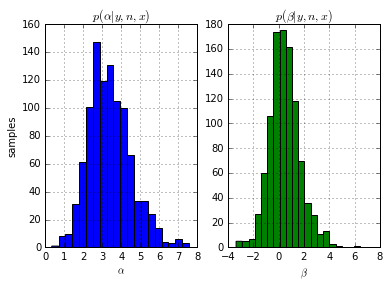

In [13]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(alpha_post, bins=20)

ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel('samples')
ax1.set_title(r'$p(\alpha|y, n, x)$')
ax1.grid(True)

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(beta_post, bins=20, color='green')

ax2.set_xlabel(r'$\beta$')
ax2.set_title(r'$p(\beta|y, n, x)$')
ax2.grid(True)

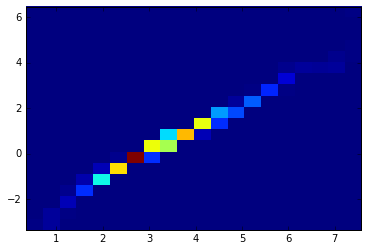

In [14]:
_ = plt.hist2d(alpha_post, beta_post, bins=20)[-1]

##### (c)
Let $\gamma_i = (\alpha_i, \beta_i)$, then
$$
\tilde{\Sigma} = \frac{1}{n}\sum_{i=1}^n(\gamma_i - \hat{\gamma})(\gamma_i - \hat{\gamma})^T
$$
So the normal approximation to the posterior is $\mathcal{N}\left({\hat{\alpha} \choose \hat{\beta}}, \Sigma \right)$

In [15]:
gamma = np.vstack((alpha_post, beta_post))
sigma = np.cov(gamma)
a_mode, b_mode = alpha_post.mean(), beta_post.mean()
print 'posterior mode:'
print (a_mode, b_mode)
print 'covariance matrix:'
print sigma

posterior mode:
(3.3932842397232745, 0.48666583810742226)
covariance matrix:
[[ 1.24790664  1.34180049]
 [ 1.34180049  1.45445565]]


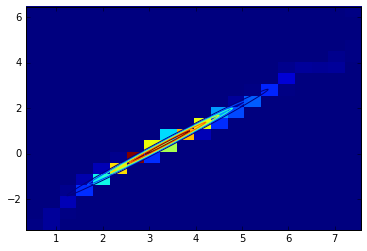

In [16]:
ax = plt.axes()
ax.hist2d(alpha_post, beta_post, bins=20)[-1]
# Draw the approximate normal distribution
def plot_isocontours(ax, func, xlimits=[1, 6], ylimits=[-4, 8],
                     numticks=1000):
    x = np.linspace(*xlimits, num=numticks)
    y = np.linspace(*ylimits, num=numticks)
    X, Y = np.meshgrid(x, y)
    zs = func(np.concatenate([np.atleast_2d(X.ravel()),
                              np.atleast_2d(Y.ravel())]).T)
    Z = zs.reshape(X.shape)
    plt.contour(X, Y, Z)
approx_norm = lambda x: stats.multivariate_normal.pdf(
    x, [a_mode, b_mode], sigma)
plot_isocontours(ax, approx_norm)

##### (d)
$$
\mathbb{E}(\alpha, \beta|y, x, n) = \int \frac{(\alpha, \beta)\cdot p(\alpha, \beta|y, x, n)}{q(\alpha, \beta)}q(\alpha, \beta)d\alpha d\beta = \sum_{i=1}^k \tilde{w}_i\cdot(\alpha_i, \beta_i)
$$
$$
w_i = \frac{p(\alpha_i)p(\beta_i)\prod_{j=1}^J p(y_j|n_j,x_j,\alpha_i,\beta_i)}{q(\alpha_i, \beta_i)}
$$

In [17]:
from statsmodels.sandbox.distributions.multivariate import \
    multivariate_t_rvs
from scipy.special import gamma
samples = multivariate_t_rvs([a_mode, b_mode], sigma, 4, 1000)
def multivariate_t_pdf(x, mu, sigma, v):
    d = np.array(mu).shape[0]
    ret = 1./ np.linalg.det(sigma)**0.5 * 1. / np.sqrt(
        (v*np.pi)**d) * gamma((v+d)/2.) / gamma(v/2.) * (
        1. + ((x - mu).dot(np.linalg.inv(sigma))*(x - mu)).sum(
        axis=1))**(-(v+d)/2)
    return ret
pdfs = multivariate_t_pdf(samples, [a_mode, b_mode], sigma, 4)

alpha, beta = samples[:, 0], samples[:, 1]
# (10, 1000)
theta = 1./(1. + np.exp(
        -alpha.reshape((1, -1)) - beta.reshape((1, -1))*x))
n_choose_y = comb(n, y)
p_alpha = stats.t.pdf(alpha/2., 4)
p_beta = stats.t.pdf(beta, 4)
p = p_alpha * p_beta * np.prod(
    n_choose_y * theta**y * (1. - theta)**(n-y), axis=0)
w = p/pdfs
w_tilde = w/w.sum(axis=0)
expect = (samples*w_tilde.reshape(-1, 1)).sum(axis=0)
print 'E(alpha|..)', expect[0]
print 'E(beta|..)', expect[1]

E(alpha|..) 3.6570168634
E(beta|..) 0.397403816104


##### (e)
$$
S_{eff} = \frac{S\bar{w}^2}{\bar{w^2}} = \frac{1}{\sum_{s=1}^S \tilde{w}^2}
$$

In [18]:
print 'effective sample size:', 1./np.sum(w_tilde**2)

effective sample size: 4.95642038918


## Exercise 10.6

##### (a)

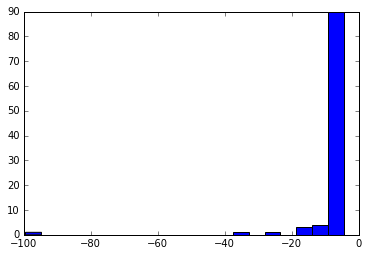

In [19]:
def exercise_10_6(S):
    samples = np.random.standard_t(3, size=S)
    w = stats.norm.pdf(samples) / stats.t.pdf(samples, 3)
    w_tilde = w / w.sum()
    return samples, w_tilde

samples, w_tilde = exercise_10_6(100)
log_w_tilde = np.log(w_tilde)
_ = plt.hist(log_w_tilde, bins=20)

##### (b)
$$
\mathbb{E}(\theta|y) = \int \frac{\theta p(\theta|y)}{q(\theta)} d\theta \approx \sum_{i=1}^S \tilde{w}_i\theta_i
$$
$$
\mathrm{var}(\theta|y) = \int \frac{\theta^2 p(\theta|y)}{q(\theta)} d\theta - \mathbb{E}(\theta|y)^2 \approx \sum_{i=1}^S \tilde{w}_i \theta_i^2 - (\sum_{i=1}^S \tilde{w}_i\theta_i)^2
$$

In [20]:
expect = (samples*w_tilde).sum()
print 'E(theta|y):', expect
var = (samples**2 * w_tilde).sum() - (expect**2).sum()
print 'var(theta|y):', var

E(theta|y): 0.0672426957983
var(theta|y): 1.11577513961


##### (c)

E(theta|y): -0.00385847408031
var(theta|y): 1.00992339781


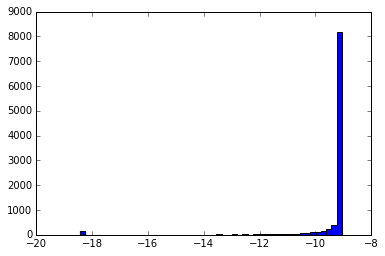

In [21]:
samples, w_tilde = exercise_10_6(10000)
log_w_tilde = np.log(w_tilde + 1e-8)
_ = plt.hist(log_w_tilde, bins=50)
expect = (samples*w_tilde).sum()
print 'E(theta|y):', expect
var = (samples**2 * w_tilde).sum() - (expect**2).sum()
print 'var(theta|y):', var

##### (d)

In [22]:
print 'effective sample size:', 1./np.sum(w_tilde**2)

effective sample size: 9195.37339363


## Exercise 10.7

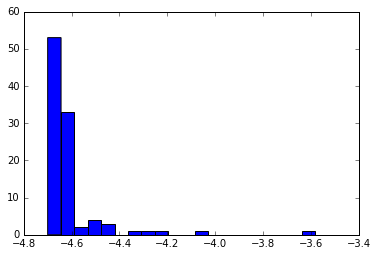

In [23]:
def exercise_10_7(S):
    samples = np.random.normal(size=S)
    w = stats.t.pdf(samples, 3) / stats.norm.pdf(samples)
    w_tilde = w / w.sum()
    return samples, w_tilde

samples, w_tilde = exercise_10_7(100)
log_w_tilde = np.log(w_tilde)
_ = plt.hist(log_w_tilde, bins=20)

In [24]:
expect = (samples*w_tilde).sum()
print 'E(theta|y):', expect
var = (samples**2 * w_tilde).sum() - (expect**2).sum()
print 'var(theta|y):', var

E(theta|y): 0.106943777759
var(theta|y): 1.19331836025


E(theta|y): -0.0432956969578
var(theta|y): 1.6572257326


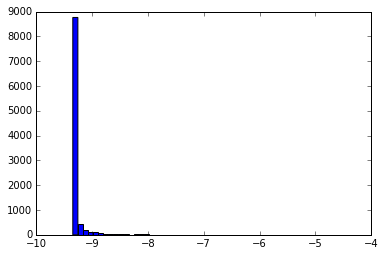

In [25]:
samples, w_tilde = exercise_10_7(10000)
log_w_tilde = np.log(w_tilde)
_ = plt.hist(log_w_tilde, bins=50)
expect = (samples*w_tilde).sum()
print 'E(theta|y):', expect
var = (samples**2 * w_tilde).sum() - (expect**2).sum()
print 'var(theta|y):', var

In [26]:
print 'effective sample size:', 1./np.sum(w_tilde**2)

effective sample size: 4830.64096352


The real value is 3. So the estimate is systematically too low. The reason is that $t_3$ has a much heavier tail than the normal proposal, so the tail probability, as well as the variance, are underestimated in this condition.